In [1]:
%load_ext nb_black

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

%matplotlib inline
import seaborn as sns

<IPython.core.display.Javascript object>

In [2]:
df = pd.read_table("price_nonnull.csv", sep=",")
df

,Unnamed: 0,Unnamed: 0.1,locality,city,postcode,region,house_is,property_subtype,price,sale,...,open_fire,terrace,terrace_area,garden,garden_area,land_surface,land_plot_surface,facades_number,swimming_pool_has,building_state
0,0,0,Hamoir Comblain-Fairon,Liège,4180,Wallonie,1,mixed_use_building,295000.0,NaN,...,0.0,1.0,36.0,1,1000.0,1403.0,1403.0,NaN,0.0,good
1,1,1,Hamoir Comblain-Fairon,Liège,4180,Wallonie,1,mixed_use_building,229000.0,NaN,...,0.0,1.0,20.0,0,0.0,9732.0,9732.0,NaN,0.0,to_renovate
2,2,2,Hamoir Comblain-Fairon,Liège,4180,Wallonie,1,apartment_block,150000.0,NaN,...,0.0,1.0,29.0,0,0.0,150.0,150.0,NaN,0.0,to_renovate
3,3,3,Hamoir Comblain-Fairon,Liège,4180,Wallonie,1,house,195000.0,NaN,...,0.0,1.0,36.0,1,100.0,475.0,475.0,NaN,0.0,good
4,4,4,Hamoir Comblain-Fairon,Liège,4180,Wallonie,1,villa,419000.0,NaN,...,0.0,1.0,50.0,0,0.0,8792.0,8792.0,NaN,0.0,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43337,64562,64562,Florenville,Luxembourg,6823,Wallonie,1,NaN,95000.0,NaN,...,0.0,NaN,NaN,1,NaN,NaN,NaN,3.0,0.0,NaN
43338,64564,64564,Onhaye,Namur,5521,Wallonie,1,NaN,98000.0,NaN,...,0.0,NaN,NaN,1,NaN,NaN,NaN,3.0,0.0,NaN
43339,64566,64566,De Haan,West-Vlaanderen,8421,Vlaanderen,1,NaN,495000.0,NaN,...,1.0,NaN,NaN,1,NaN,NaN,NaN,3.0,0.0,to_renovate
43340,64568,64568,RTBF,Bruxelles,1044,Bruxelles-Capitale,1,NaN,589000.0,NaN,...,0.0,NaN,NaN,1,NaN,NaN,NaN,4.0,0.0,good


<IPython.core.display.Javascript object>

In [3]:
# Change dtypes

df["rooms_number"] = pd.Series(df["rooms_number"], dtype=pd.Int64Dtype())
df["kitchen_has"] = pd.Series(df["kitchen_has"], dtype=pd.Int64Dtype())
df["furnished"] = pd.Series(df["furnished"], dtype=pd.Int64Dtype())
df["open_fire"] = pd.Series(df["open_fire"], dtype=pd.Int64Dtype())
df["terrace"] = pd.Series(df["terrace"], dtype=pd.Int64Dtype())
df["garden"] = pd.Series(df["garden"], dtype=pd.Int64Dtype())
df["garden_area"] = pd.Series(df["garden_area"], dtype=pd.Int64Dtype())
df["facades_number"] = pd.Series(df["facades_number"], dtype=pd.Int64Dtype())
df["swimming_pool_has"] = pd.Series(df["swimming_pool_has"], dtype=pd.Int64Dtype())
df["postcode"] = pd.Series(df["postcode"], dtype=pd.Int64Dtype())

# Delete Unnamed columns
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

<IPython.core.display.Javascript object>

In [4]:
df.dtypes

locality              object
city                  object
postcode               Int64
region                object
house_is               int64
property_subtype      object
price                float64
sale                  object
rooms_number           Int64
area                 float64
kitchen_has            Int64
furnished              Int64
open_fire              Int64
terrace                Int64
terrace_area         float64
garden                 Int64
garden_area            Int64
land_surface         float64
land_plot_surface    float64
facades_number         Int64
swimming_pool_has      Int64
building_state        object
dtype: object

<IPython.core.display.Javascript object>

In [5]:
# Define continuous and categorical variables

cont_var = df[
    [
        "price",
        "rooms_number",
        "area",
        "terrace_area",
        "garden_area",
        "land_surface",
        "land_plot_surface",
        "facades_number",
    ]
]


categ_var = df[
    [
        "price", # also here so as to explore how it relates to categorical variables
        "city",
        "region",
        "house_is",
        "property_subtype",
        "kitchen_has",
        "furnished",
        "terrace",
        "garden",
        "swimming_pool_has",
        "building_state",
    ]
]


<IPython.core.display.Javascript object>

<AxesSubplot:>

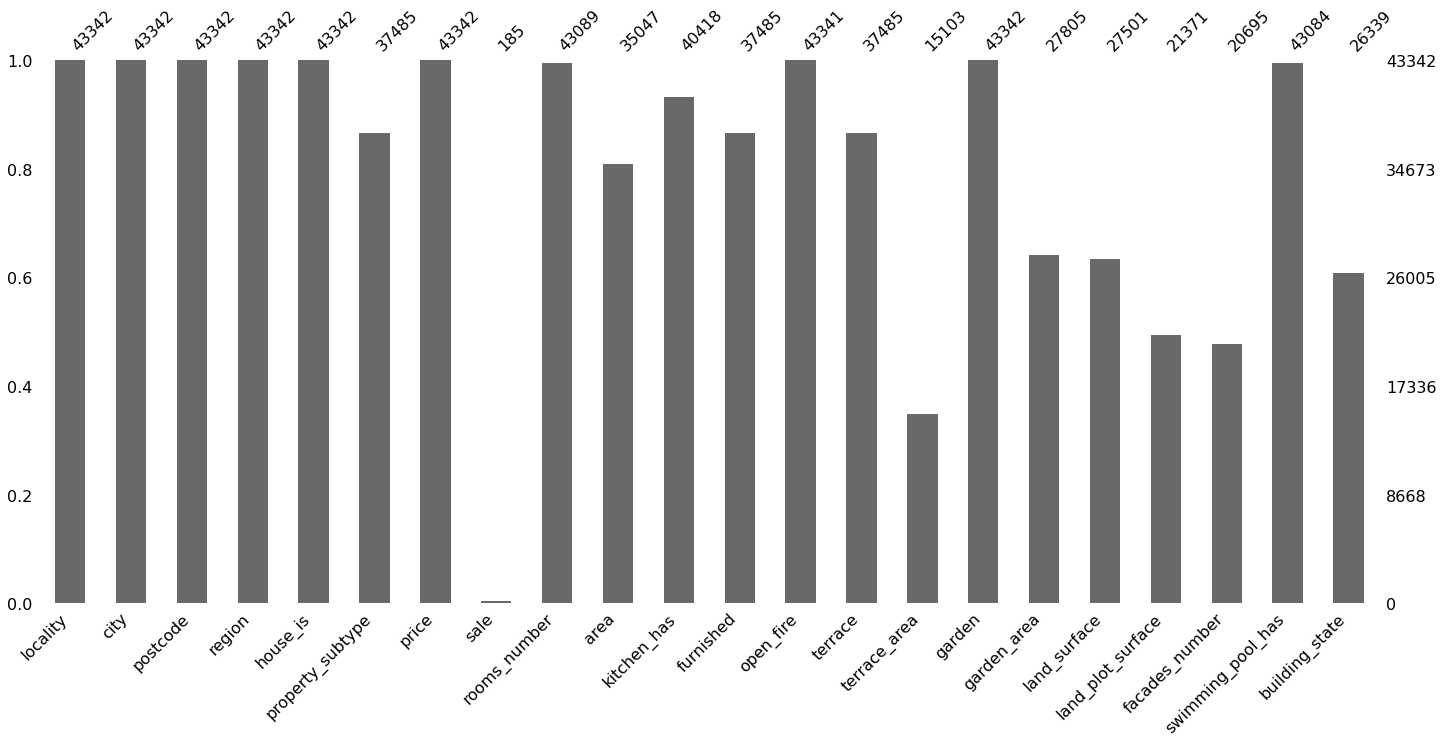

<IPython.core.display.Javascript object>

In [6]:
# Check missing data

import missingno as msno  # this package provides plots for missing data

msno.bar(df)

# Detect outliers in price

## Detect outliers through boxplots

<AxesSubplot:xlabel='price'>

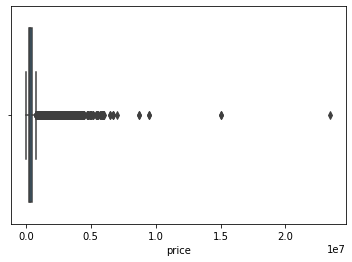

<IPython.core.display.Javascript object>

In [7]:
sns.boxplot(x="price", data=df)

## Detect outliers through z-scores

In [8]:
# Add column with zscores for price
df["price_zscores"] = np.abs(stats.zscore(df["price"]))

<IPython.core.display.Javascript object>

In [9]:
# Find where price zscores > 3 for all variables
print(np.where(df["price_zscores"] > 3))

(array([  298,   322,   534,   545,   693,   694,   706,   711,   716,
         717,   810,   843,   846,   865,   866,   876,  1156,  1173,
        1178,  1179,  1194,  1196,  1197,  1199,  1204,  1207,  1208,
        1210,  1213,  1216,  1217,  1221,  1223,  1224,  1231,  1243,
        1283,  1297,  1307,  1320,  1322,  1333,  1338,  1366,  1374,
        1375,  1391,  1393,  1394,  1396,  1401,  1405,  1406,  1408,
        1411,  1414,  1415,  1419,  1421,  1422,  1430,  1443,  1482,
        1872,  1918,  2131,  2709,  2717,  2718,  2725,  2746,  2765,
        2889,  2935,  2961,  2984,  3311,  3312,  3315,  3331,  3334,
        3350,  3368,  3369,  3370,  3371,  3373,  3380,  3383,  3545,
        3546,  3547,  3557,  3693,  3694,  3747,  3751,  3849,  3850,
        3853,  3862,  3871,  4038,  4039,  4040,  4050,  4224,  4252,
        4500,  4669,  4672,  4683,  4684,  4685,  4782,  4796,  4798,
        4860,  4865,  4883,  4895,  4898,  4899,  4900,  4909,  4914,
        4919,  4920

<IPython.core.display.Javascript object>

In [10]:
# Create new dataset with price outliers removed
df_out_rm = df[df["price_zscores"] < 3]

<IPython.core.display.Javascript object>

In [11]:
df_out_rm.shape  # (42489, 23)

(42489, 23)

<IPython.core.display.Javascript object>

In [12]:
# Create continuous and categorical variables with new data

cont_var_outrm = df_out_rm[
    [
        "price",
        "rooms_number",
        "area",
        "terrace_area",
        "garden_area",
        "land_surface",
        "land_plot_surface",
        "facades_number",
    ]
]


categ_var_outrm = df_out_rm[
    [
        "price",
        "city",
        "region",
        "house_is",
        "property_subtype",
        "kitchen_has",
        "furnished",
        "terrace",
        "garden",
        "swimming_pool_has",
        "building_state",
    ]
]

<IPython.core.display.Javascript object>

# Visualisations with no price outliers

## Correlations

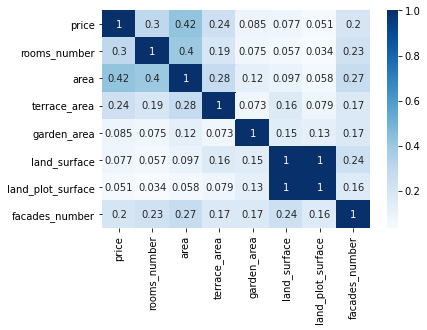

<IPython.core.display.Javascript object>

In [13]:
# Calculate correlations among continuous variables

corr = cont_var_outrm.corr()

# Heatmap

sns.heatmap(corr, cmap="Blues", annot=True)
plt.savefig("heatmap_annot.png", bbox_inches="tight")

## Price by area surface across regions

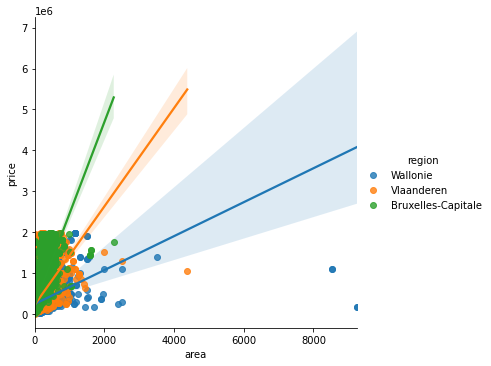

<IPython.core.display.Javascript object>

In [14]:
# Regression line
sns.lmplot(x="area", y="price", data=df_out_rm, hue="region")

## Price based on type of property by region

/home/sara/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


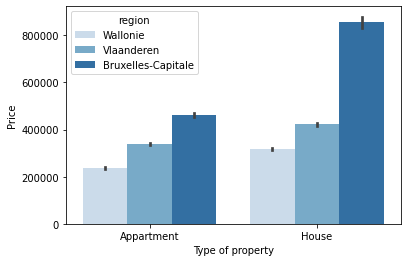

<IPython.core.display.Javascript object>

In [15]:
sns.barplot(x="house_is", y="price", data=df_out_rm, hue="region", palette="Blues")
ax = plt.subplot()
ax = ax.set_xticklabels(["Appartment", "House"])
plt.xlabel("Type of property")
plt.ylabel("Price")
plt.savefig("price_houseis_region.png", bbox_inches="tight")

## Price by provinces

Text(0, 0.5, 'Price')

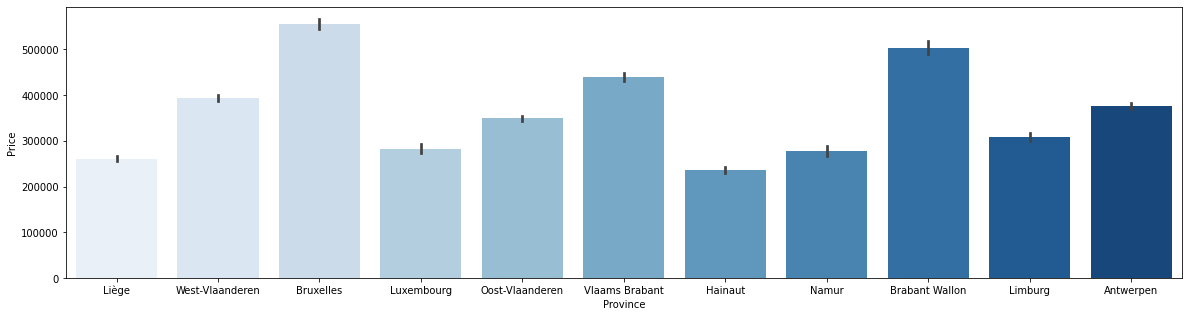

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(20, 5))
sns.barplot(x="city", y="price", data=df_out_rm, palette="Blues")
plt.xlabel("Province")
plt.ylabel("Price")

## Price in each region

### Brussels

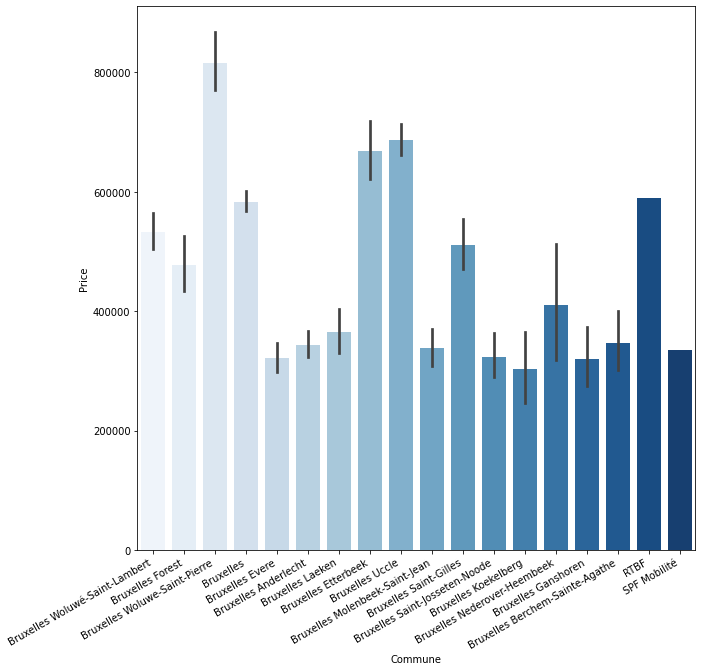

<IPython.core.display.Javascript object>

In [17]:
brussels = df_out_rm[df_out_rm["region"] == "Bruxelles-Capitale"]
plt.figure(figsize=(10, 10))
chart = sns.barplot(x="locality", y="price", data=brussels, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("Commune")
plt.ylabel("Price")
plt.savefig("brussels.png", bbox_inches="tight")

### Wallonia

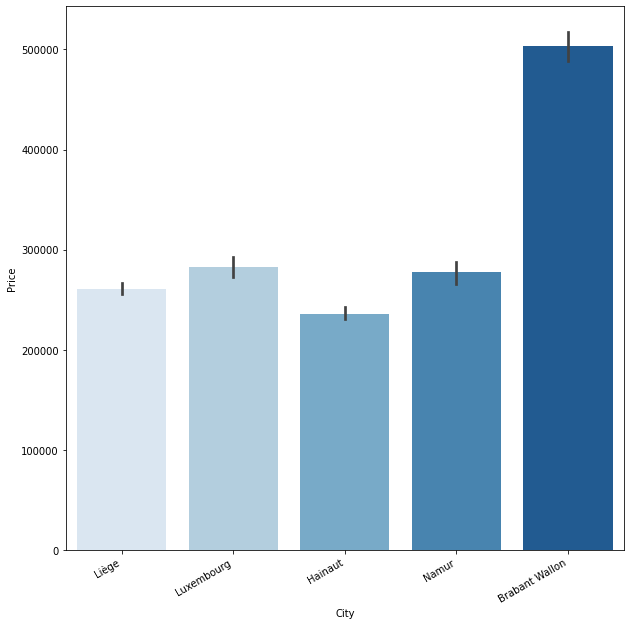

<IPython.core.display.Javascript object>

In [18]:
wallonie = df_out_rm[df_out_rm["region"] == "Wallonie"]
plt.figure(figsize=(10, 10))
chart = sns.barplot(x="city", y="price", data=wallonie, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("City")
plt.ylabel("Price")
plt.savefig("wallonie.png", bbox_inches="tight")

### Flanders

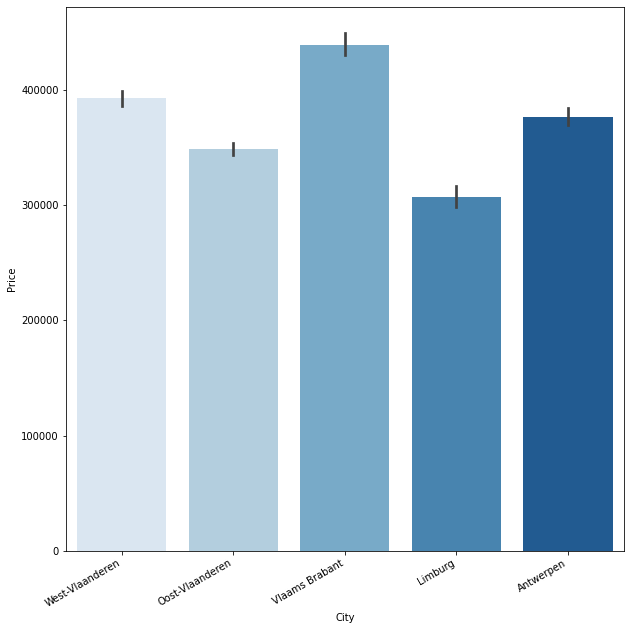

<IPython.core.display.Javascript object>

In [19]:
flanders = df_out_rm[df_out_rm["region"] == "Vlaanderen"]
plt.figure(figsize=(10, 10))
chart = sns.barplot(x="city", y="price", data=flanders, palette="Blues")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment="right")
plt.xlabel("City")
plt.ylabel("Price")
plt.savefig("wallonie.png", bbox_inches="tight")

# Price based on building state by region

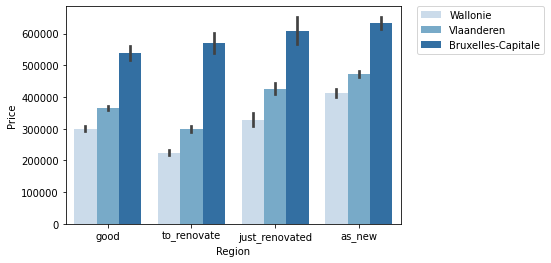

<IPython.core.display.Javascript object>

In [20]:
sns.barplot(
    x="building_state", y="price", hue="region", data=df_out_rm, palette="Blues"
)
plt.xlabel("Region")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("price_area_region.png", bbox_inches="tight")